# Gemma 3 - 12B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3"
prompt_approaches = os.listdir(base_output_dir)

## Model Metrics

In [3]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


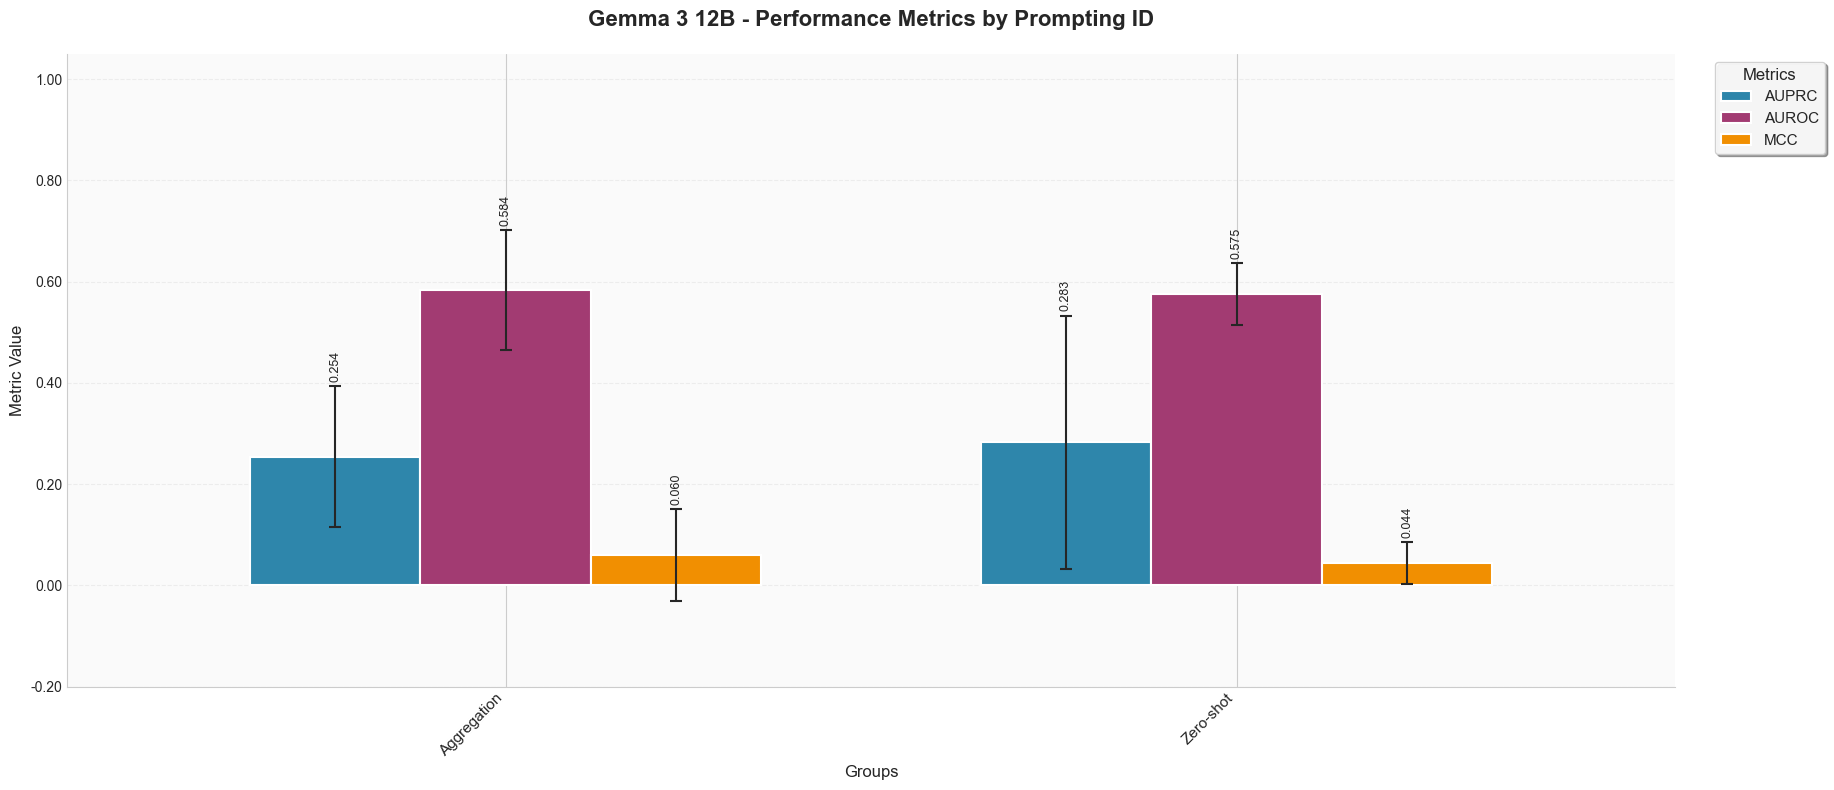

In [4]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Gemma 3 12B - ",
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


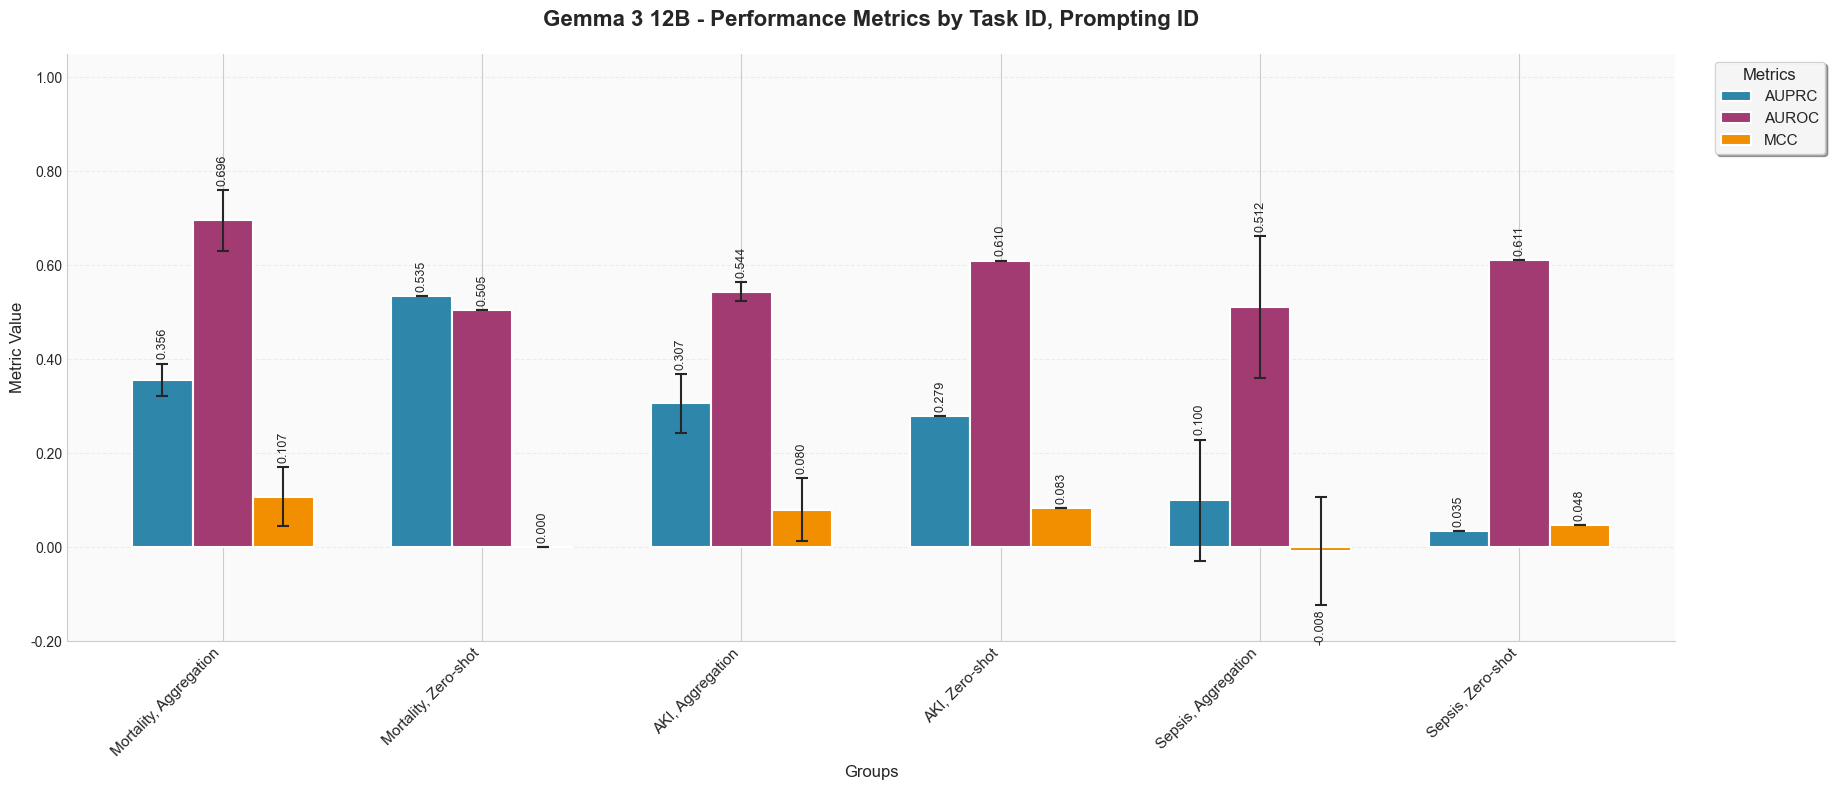

In [5]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="Gemma 3 12B - ",
)

In [6]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [7]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=prompt_approaches[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', options=('sarvari_2024_aggregation_preprocessor', 'zhu_2024b_zero_sho…

In [8]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3\sarvari_2024_aggregation_preprocessor
Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250623_045848
Model N

In [9]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,25.33s,24929.14s,2203,2167383,300,295200,305,679,984,0.45
1,aki,hirid,24.79s,24344.77s,2206,2166641,300,294600,159,823,982,0.19
2,aki,miiv,25.08s,24680.77s,2206,2170308,300,295200,229,755,984,0.30
3,mortality,eicu,25.46s,2545.90s,2182,218165,300,30000,7,93,100,0.08
4,mortality,hirid,25.47s,2546.74s,2186,218643,300,30000,11,89,100,0.12
5,mortality,miiv,25.46s,2545.96s,2185,218519,300,30000,12,88,100,0.14
6,sepsis,eicu,25.52s,25007.23s,2235,2189858,300,294000,47,933,980,0.05
7,sepsis,hirid,25.54s,24745.34s,2239,2169805,300,290700,73,896,969,0.08
8,sepsis,miiv,25.54s,25282.39s,2237,2214696,300,297000,25,965,990,0.03


In [10]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,prompting_id,run_id,metrics_summary
0,Gemma3,sepsis,eicu,sarvari_2024_aggregation_preprocessor,20250624092106,"{'overall': {'auroc': 0.484, 'auprc': 0.034, '..."
1,Gemma3,sepsis,hirid,sarvari_2024_aggregation_preprocessor,20250624092106,"{'overall': {'auroc': 0.675, 'auprc': 0.249, '..."
2,Gemma3,sepsis,miiv,sarvari_2024_aggregation_preprocessor,20250624092106,"{'overall': {'auroc': 0.376, 'auprc': 0.018000..."
3,Gemma3,mortality,eicu,sarvari_2024_aggregation_preprocessor,20250623045848,"{'overall': {'auroc': 0.756, 'auprc': 0.352, '..."
4,Gemma3,mortality,hirid,sarvari_2024_aggregation_preprocessor,20250623045848,"{'overall': {'auroc': 0.628, 'auprc': 0.324, '..."
5,Gemma3,mortality,miiv,sarvari_2024_aggregation_preprocessor,20250623045848,"{'overall': {'auroc': 0.704, 'auprc': 0.393, '..."
6,Gemma3,aki,eicu,sarvari_2024_aggregation_preprocessor,20250623045848,"{'overall': {'auroc': 0.53, 'auprc': 0.36, 'no..."
7,Gemma3,aki,hirid,sarvari_2024_aggregation_preprocessor,20250623045848,"{'overall': {'auroc': 0.534, 'auprc': 0.238000..."
8,Gemma3,aki,miiv,sarvari_2024_aggregation_preprocessor,20250623045848,"{'overall': {'auroc': 0.5670000000000001, 'aup..."


In [11]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Adding new record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250624_092106'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250624_092106'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250624_092106'
Adding new record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_045848'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_045848'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_045848'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_045848'
Updating existing record: model_id='Gemma3', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_045848'
Updating existing reco